In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import pandas as pd
from joblib import dump

mnist_dwnld = fetch_openml("mnist_784",version=1)
print(mnist_dwnld.keys())
print(type(mnist_dwnld))

mnist_dwnload = fetch_openml("mnist_784", version=1)

# Save the Bunch object
dump(mnist_dwnload, "mnist_dataset_784_v1.joblib")

#30s

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import pandas as pd
from joblib import load

mnist_loaded = load("C:/Users/MaxB2/Documents/Machine_Is_Learning/mnist_dataset_784_v1.joblib")

In [2]:
"""Value type tranformation and train-test split"""
X,y = mnist_loaded["data"],mnist_loaded["target"]
y = y.astype(np.uint8)
print("Before: ",type(y[rd.randint(0,X.shape[0]-1)]))
y = y.astype(np.uint8)
print("After: ",type(y[rd.randint(0,X.shape[0]-1)]))

X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]  

Before:  <class 'numpy.uint8'>
After:  <class 'numpy.uint8'>


In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
from sklearn.metrics import accuracy_score
acc_knn_1 = accuracy_score(y_test, y_pred1)
print(acc_knn_1)

0.9714


Index:  1472   Label:  1


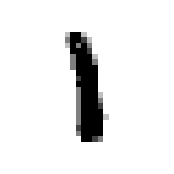

In [4]:
"""Number Demonstration"""
index = rd.randint(0,X.shape[0]-1)
image_array = np.array(X.iloc[index])

def plot_digit(Data):
    digit_array = Data.reshape(28,28)
    plt.figure(figsize=(2, 2))
    plt.imshow(digit_array,cmap="binary")
    plt.axis("off")
    #plt.show()
print("Index: ", index,"  Label: ",y[index])
plot_digit(image_array)

In [22]:
"""Data Augmentation XXXXYYYYZZZZ
X_train_base = X_train.copy()
y_train_base = y_train.copy()

from scipy.ndimage import shift
import pandas as pd

sa = 1
desired_shifts = np.array([[0,sa],[0,-sa],[sa,0],[-sa,0]])

def augment_data(input_data_list,input_label_list,shift_list):
    shifted_pics_data = []
    shifted_pics_labels = []
    for i in range(len(input_data_list)): # input_list to be augmented
        for s in range(len(shift_list)): # shift_list with [v,h] vectors to be applied
            single_image_data = np.array(input_data_list.iloc[i]) 

            digit_image = np.array(single_image_data.reshape(28,28))
            #int(np.sqrt(single_image_data[:1].shape[1])),int(np.sqrt(single_image_data[:1].shape[1]))
            shifted_pic_AxA = shift(digit_image,shift_list[s],cval=0)
            shifted_pic_data = np.array(shifted_pic_AxA.reshape(784,))

            shifted_pics_data.append(shifted_pic_data)
            shifted_pics_labels.append(input_label_list[i]) 

    X_train_augmented_output = input_data_list.append(pd.DataFrame(shifted_pics_data, columns=input_data_list.columns), ignore_index=True)
    y_train_augmented_output = input_label_list.append(pd.Series(shifted_pics_labels), ignore_index=True)
    return X_train_augmented_output, y_train_augmented_output

X_train_augmented, y_train_augmented = augment_data(X_train_base,y_train_base,desired_shifts)

Classifier and CV Accuracy Calculation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
best_estimator = KNeighborsClassifier(n_neighbors=4, weights='distance')
accuracy_scores = cross_val_score(best_estimator,X_train_augmented,y_train_augmented,cv=3, scoring="accuracy")
print("Mean Accuracy: ",round(np.mean(accuracy_scores),2))"""


C:\Users\MaxB2\AppData\Local\Temp\ipykernel_8884\1257280377.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train_augmented_output = input_data_list.append(pd.DataFrame(shifted_pics_data, columns=input_data_list.columns), ignore_index=True)
C:\Users\MaxB2\AppData\Local\Temp\ipykernel_8884\1257280377.py:28: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train_augmented_output = input_label_list.append(pd.Series(shifted_pics_labels), ignore_index=True)


'Classifier and CV Accuracy Calculation\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import cross_val_score\nbest_estimator = KNeighborsClassifier(n_neighbors=4, weights=\'distance\')\naccuracy_scores = cross_val_score(best_estimator,X_train_augmented,y_train_augmented,cv=3, scoring="accuracy")\nprint("Mean Accuracy: ",round(np.mean(accuracy_scores),2))'

In [5]:
"""Data Augmentation XYZXYZXYZXYZ"""
X_train_base = X_train.copy()
y_train_base = y_train.copy()

from scipy.ndimage import shift
import pandas as pd

sa = 1
desired_shifts = np.array([[0,sa],[0,-sa],[sa,0],[-sa,0]])

def augment_data(input_data_list,input_label_list,shift_list): # f(x,y,z)
    shifted_pics_data = []
    shifted_pics_labels = []
    for s in range(len(shift_list)):
        for i in range(len(input_data_list)):
         
            single_image_data = np.array(input_data_list.iloc[i]) 

            digit_image = np.array(single_image_data.reshape(28,28))
            #int(np.sqrt(single_image_data[:1].shape[1])),int(np.sqrt(single_image_data[:1].shape[1]))
            shifted_pic_AxA = shift(digit_image,shift_list[s],cval=0)
            shifted_pic_data = np.array(shifted_pic_AxA.reshape(784,))

            shifted_pics_data.append(shifted_pic_data)
            shifted_pics_labels.append(input_label_list[i]) 

    X_train_augmented_output = input_data_list.append(pd.DataFrame(shifted_pics_data, columns=input_data_list.columns), ignore_index=True)
    y_train_augmented_output = input_label_list.append(pd.Series(shifted_pics_labels), ignore_index=True)
    return X_train_augmented_output, y_train_augmented_output

X_train_augmented, y_train_augmented = augment_data(X_train_base,y_train_base,desired_shifts)

C:\Users\MaxB2\AppData\Local\Temp\ipykernel_24972\2327639519.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train_augmented_output = input_data_list.append(pd.DataFrame(shifted_pics_data, columns=input_data_list.columns), ignore_index=True)
C:\Users\MaxB2\AppData\Local\Temp\ipykernel_24972\2327639519.py:28: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train_augmented_output = input_label_list.append(pd.Series(shifted_pics_labels), ignore_index=True)


Original Index:  18607  Original Label:  4
New Index:  138607  New Label:  4


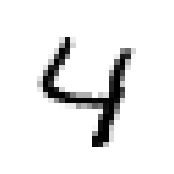

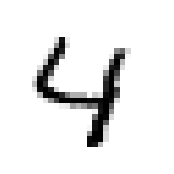

In [98]:
"""Augmented Data Visual Check"""
#original_index = rd.randint(0,X_train_base.shape[0])
original_index = rd.randint(0,X_train_base.shape[0])
new_index = int(original_index)+rd.randint(1,4)*X_train_base.shape[0]


original_image_array = np.array(X_train_augmented.iloc[original_index])
new_image_array = np.array(X_train_augmented.iloc[new_index])

print("Original Index: ", original_index," Original Label: ",y_train_augmented[original_index])
plot_digit(original_image_array)
print("New Index: ", new_index," New Label: ",y_train_augmented[new_index])
plot_digit(new_image_array)

KNeighborsClassifier(n_neighbors=4, weights='distance')

0.9763


In [9]:
"""Classifier and CV Accuracy Calculation"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
best_estimator = KNeighborsClassifier(n_neighbors=4, weights='distance')
accuracy_scores = cross_val_score(best_estimator,X_train_augmented,y_train_augmented,cv=3, scoring="accuracy")
print("Mean Accuracy: ",np.mean(accuracy_scores))

Mean Accuracy:  0.97815


In [ ]:
"""OLD Image Shifter Function
X_train_augmented = X_train.copy()
y_train_extended = y_train.copy()

print(type(X_train_augmented))
print(type(y_train_extended))

from scipy.ndimage import shift
import pandas as pd

rightshift = np.array([0,1])
leftshift = np.array([0,-1])
downshift = np.array([1,0])
upshift = np.array([-1,0])
shifts = np.array([rightshift,leftshift,downshift,upshift])

shifted_digits = []
additional_labels = []


def create_4_shifted_digits(orig_pic,shiftdirection): # original_pic data and shift_direction is passed
    pic_28x28 = np.array(orig_pic.reshape(28,28))
    shifted_pic_28x28 = shift(pic_28x28,shiftdirection,cval=0)
    shifted_pic_data = np.array(shifted_pic_28x28.reshape(784,))
    return shifted_pic_data

def augment_data
for i in range(len(X_train_augmented)): # input_list to be augmented
    for s in range(len(shifts)): # shift_list with [v,h] vectors to be applied
        image_array = np.array(X_train_augmented.iloc[i]) 
        shifted_digits.append(create_4_shifted_digits(image_array,shifts[s])) # shifted_pic where shifted pic data is stored
        additional_labels.append(y_train_extended[i]) # label_list where corrosponding labels are stored

shifted_digits = pd.DataFrame(shifted_digits, columns=X_train_augmented.columns)
additional_labels = pd.Series(additional_labels)

X_train_augmented = X_train_augmented.append(shifted_digits, ignore_index=True)
y_train_extended = y_train_extended.append(additional_labels, ignore_index=True)

"Classifier and CV Accuracy Calculation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
best_estimator = KNeighborsClassifier(n_neighbors=4, weights='distance')
accuracy_scores = cross_val_score(best_estimator,X_train_augmented,y_train_extended,cv=3, scoring="accuracy")
print("Mean Accuracy: ",round(np.mean(accuracy_scores),2))
"""